In [36]:
import os
import re
import cmath
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math as math

from glob import glob
from collections import OrderedDict
from scipy.optimize import least_squares
from scipy.optimize import curve_fit

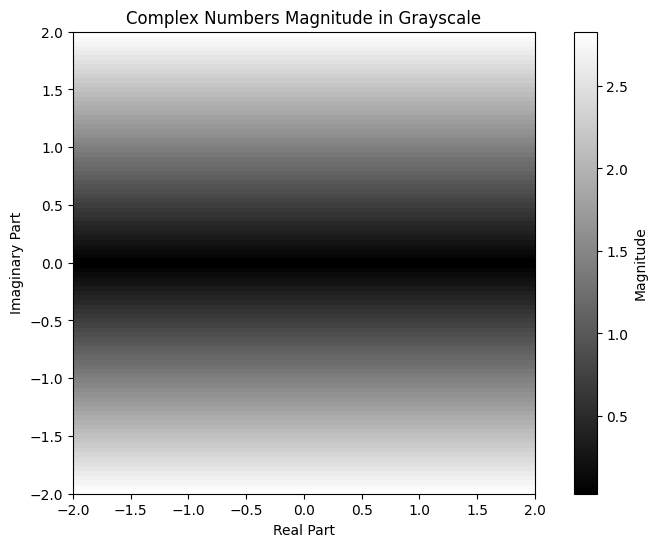

In [69]:
def exponential_complex(r, p):
    return r*cmath.exp(1j*p)

values= np.linspace(-2,2,100)

x=values+values*1j

polars=[]

for i in x:
    polars.append(cmath.polar(i))

values_func=[]

for tupla in polars:
    z=exponential_complex(tupla[0], tupla[1])
    values_func.append(z)

# Convert values_func to a NumPy array for easier manipulation
values_func_array = np.array(values_func)

# Compute the magnitudes of the complex numbers
magnitudes = np.abs(values_func_array)

# Ensure magnitudes is a 2D array
if len(magnitudes.shape) == 1:
    magnitudes = magnitudes[:, np.newaxis]

# Plotting
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.imshow(magnitudes, cmap='gray', extent=[-2, 2, -2, 2])  # Use absolute value for magnitude
plt.colorbar(label='Magnitude')  # Add a colorbar to indicate magnitude levels
plt.title('Complex Numbers Magnitude in Grayscale')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.show()

In [47]:
# Función para calcular la función exponencial compleja
def exponential_complex(z):
    return cmath.exp(z)

# Genera un rango de valores reales para z
real_part = np.linspace(-2, 2, 100)

# Crea un array de números complejos basado en real_part
complex_values = real_part + 1j * real_part

plt.plot(complex_values, cmath.exp(complex_values))

TypeError: only length-1 arrays can be converted to Python scalars

In [42]:


# Aplica la función exponencial compleja a cada valor
# Usando una comprensión de lista para iterar sobre cada elemento del array
exp_values = [exponential_complex(value) for value in complex_values]

# Convierte los valores complejos a coordenadas polares
r, theta = cmath.polar(np.array(exp_values))

# Grafica en coordenadas polares
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, polar=True)
ax.plot(theta, r)
ax.set_title('Función Exponencial Compleja en Coordenadas Polares')

plt.show()

TypeError: only length-1 arrays can be converted to Python scalars